<a href="https://colab.research.google.com/github/toby-j/COM3029-NLP/blob/main/Grammer_Correction_(Ex_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and Loading

In [ ]:
try:
  !pip install datasets
  !pip install transformers
  !pip install language-tool-python
  !pip install contractions
except:
  import locale
  locale.getpreferredencoding = lambda: "UTF-8"
  !pip install datasets
  !pip install transformers
  !pip install language-tool-python
  !pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 15.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 47.6 MB/s eta 0:00

In [ ]:
import tensorflow as tf
from tensorflow import keras

from keras.models import Model
from keras.layers import Input
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import to_categorical
from numpy import *
import numpy as np

# nltk
import nltk
from nltk import pos_tag, word_tokenize
from nltk.corpus import wordnet, stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

# Spelling imports
import re
import spacy
import language_tool_python
import spacy
import contractions
from language_tool_python import LanguageTool


from collections import defaultdict

# Huggingface
from transformers import TFBertForSequenceClassification, AutoTokenizer
from datasets import Dataset, load_dataset, concatenate_datasets, DatasetDict

#Metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Classnames

In [ ]:
raw_dataset = load_dataset("go_emotions")

Generating train split:   0%|          | 0/43410 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5426 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5427 [00:00<?, ? examples/s]

Dataset go_emotions downloaded and prepared to /root/.cache/huggingface/datasets/go_emotions/simplified/0.0.0/2637cfdd4e64d30249c3ed2150fa2b9d279766bfcd6a809b9f085c61a90d776d. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
{'0': 'admiration',
 '1': 'amusement',
 '2': 'anger',
 '3': 'annoyance',
 '4': 'approval',
 '5': 'caring',
 '6': 'confusion',
 '7': 'curiosity',
 '8': 'desire',
 '9': 'disappointment',
 '10': 'disapproval',
 '11': 'disgust',
 '12': 'embarrassment',
 '13': 'excitement',
 '14': 'fear',
 '15': 'gratitude',
 '16': 'grief',
 '17': 'joy',
 '18': 'love',
 '19': 'nervousness',
 '20': 'optimism',
 '21': 'pride',
 '22': 'realization',
 '23': 'relief',
 '24': 'remorse',
 '25': 'sadness',
 '26': 'surprise',
 '27': 'neutral'}

all_class_names = [
    "admiration",
    "amusement",
    "anger",
    "annoyance",
    "approval",
    "caring",
    "confusion",
    "curiosity",
    "desire",
    "disappointment",
    "disapproval",
    "disgust",
    "embarrassment",
    "excitement",
    "fear",
    "gratitude",
    "grief",
    "joy",
    "love",
    "nervousness",
    "optimism",
    "pride",
    "realization",
    "relief",
    "remorse",
    "sadness",
    "surprise",
    "neutral",
]

# Global Functions

## Display

In [ ]:
def plot_graphs(vals, name, y_lim = 99999, y_scale = "linear", legend = []):
  """
  vals : list[list]
    a list of (a list of values for each epoch) - default expects [train values, test values]
  name : str
    name of type of values (goes on y-axis) eg "loss", "accuracy"
  y_lim : int
    greatest value on y axis is min(y_lim, max value in vals)
  y_scale : str
    controls scale of y-axis eg "linear", "logarithmic
  legend : list[str]
    allows for a custom legend
  """
  for val in vals:
    plt.plot(val)

  plt.ylabel(name)
  plt.xlabel("epoch")
  plt.xlim(0, len(vals[0]) - 1)
  if y_scale == "linear":
    plt.ylim(min(0, array(vals).min()), min(y_lim, array(vals).max()))
  plt.yscale(y_scale)

  if len(legend) > 0:
    plt.legend(legend)
  else:
    plt.legend(["train", "test"])

  plt.show()

  print(['{:.2e}'.format(v[-1]) for v in vals])

In [ ]:
def output_metrics(model, test_data, test_labels):
  predictions = model.predict(test_data)

  y_pred  = np.argmax(predictions, axis=-1)
  y_test = np.argmax(test_labels, axis=-1)

  print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
  print(f'F1 score: {f1_score(y_test, y_pred, average="weighted")}')
  print(f'Precision score: {precision_score(y_test, y_pred, average="weighted")}')
  print(f'Recall score: {recall_score(y_test, y_pred, average="weighted")}')

In [ ]:
# Plot low, med, high spelling corrections based on Levenshtein distance
def plot_corrections(corrections):
    labels = list(corrections.keys())
    values = [len(corrections[label]) for label in labels]
    plt.bar(labels, values)
    plt.xlabel('Edit Distance Category')
    plt.ylabel('Number of Corrections')
    plt.title('Correction Counts by Edit Distance Category')
    plt.show()

In [ ]:
from sklearn import metrics

def plot_confusion_matrix(model_input, test_data, test_labels):
  predictions = model_input.predict(test_data)

  y_pred  = np.argmax(predictions, axis=-1)
  y_test = np.argmax(test_labels, axis=-1)

  confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

  labels = list(set(y_test) | set(y_pred))
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=labels)

  fig, ax = plt.subplots(figsize=(10, 8))
  cm_display.plot(ax=ax)


  plt.show()

## Utility

Functions shared across all experiments.

In [ ]:
def tokenize_dataset(data):
    # Keys of the returned dictionary will be added to the dataset as columns
    tokenizer_out = tokenizer(data["text"], padding = "max_length", truncation = True, max_length = seq_len) # Sets length of tokenized string to mean token sequence length
    for key in tokenizer_out:
      data[key] = tokenizer_out[key]
    return data

## Variables
Variables that are shared across all experiments.

In [ ]:
#Load Tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

## Levenshtein Distance Algorithm
This algorithm measures how different two words are. This based on the number of characters needed to be altered.

To visualise how the changes of each experiment are different from each other, I use this algorithm to calculate low, medium and high edit distances of words that Hunspell corrects.

The more low edit distances that are made, the more likely the correction that Hunspell made was indeed correct. Therefore, we're looking at minimising medium and high edit distances.

In [ ]:
def levenshtein_distance(s, t):
    # Normalise lengths
    m, n = len(s), len(t)
    if m < n:
        # if length of t is greater s, swap them round.
        return levenshtein_distance(t, s)
    if n == 0:
        return m
    previous_row = range(n + 1)
    for i, c1 in enumerate(s):
        current_row = [i + 1]
        for j, c2 in enumerate(t):
            insertions = previous_row[j + 1] + 1
            deletions = current_row[j] + 1
            substitutions = previous_row[j] + (c1 != c2)
            current_row.append(min(insertions, deletions, substitutions))
        previous_row = current_row
    return previous_row[-1]

# Introduction

This notebook is a pre-processing experiment, which introduces spell-checking on a standardised control model trained on the GoEmotions dataset. As as group we developed the control model to ensure an accurate and trustworthy comparson of results from each of our experiments.

## Control Model

In order to compare the results obtained from experiments conducted by different group members, each experiment conducted by any member begins from the same starting notebook. This notebook includes the following functionality:

Importing libraries to enforce standardisation of development environment.

*   Dataset preparation techniques to ensure the same 14 chosen classes are used and that samples outside of those 14 classes are removed in the same way.
*   A simple pre-processing pipeline that only involves tokenisation.
*   A Transformer based model that utilises transfer learning based on the BERT transformer model. The only adjustment to this model is the addition of a TF Dense layer with the sigmoid activiation function which enables multi class prediction. The ADAM activation function has also been utilised as the optimizer.







    

    

    


# Control

## Dataset Preparation
The following section describes the standardised way in which the dataset is prepared for training. These steps include the filtering of classes to ensure the dataset only includes the required 14. The prepartaion of the dataset has been controlled (kept the same) for each experiment to enable accurate and fair measuring of the results yielded by the modified variable in each experiment.

{'grief': 77, 'pride': 111, 'relief': 153, 'nervousness': 164, 'embarrassment': 303, 'remorse': 545, 'fear': 596, 'desire': 641, 'disgust': 793, 'excitement': 853, 'surprise': 1060, 'caring': 1087, 'realization': 1110, 'disappointment': 1269, 'sadness': 1326, 'confusion': 1368, 'joy': 1452, 'anger': 1567, 'optimism': 1581, 'disapproval': 2022, 'love': 2086, 'curiosity': 2191, 'amusement': 2328, 'annoyance': 2470, 'gratitude': 2662, 'approval': 2939, 'admiration': 4130, 'neutral': 14219}


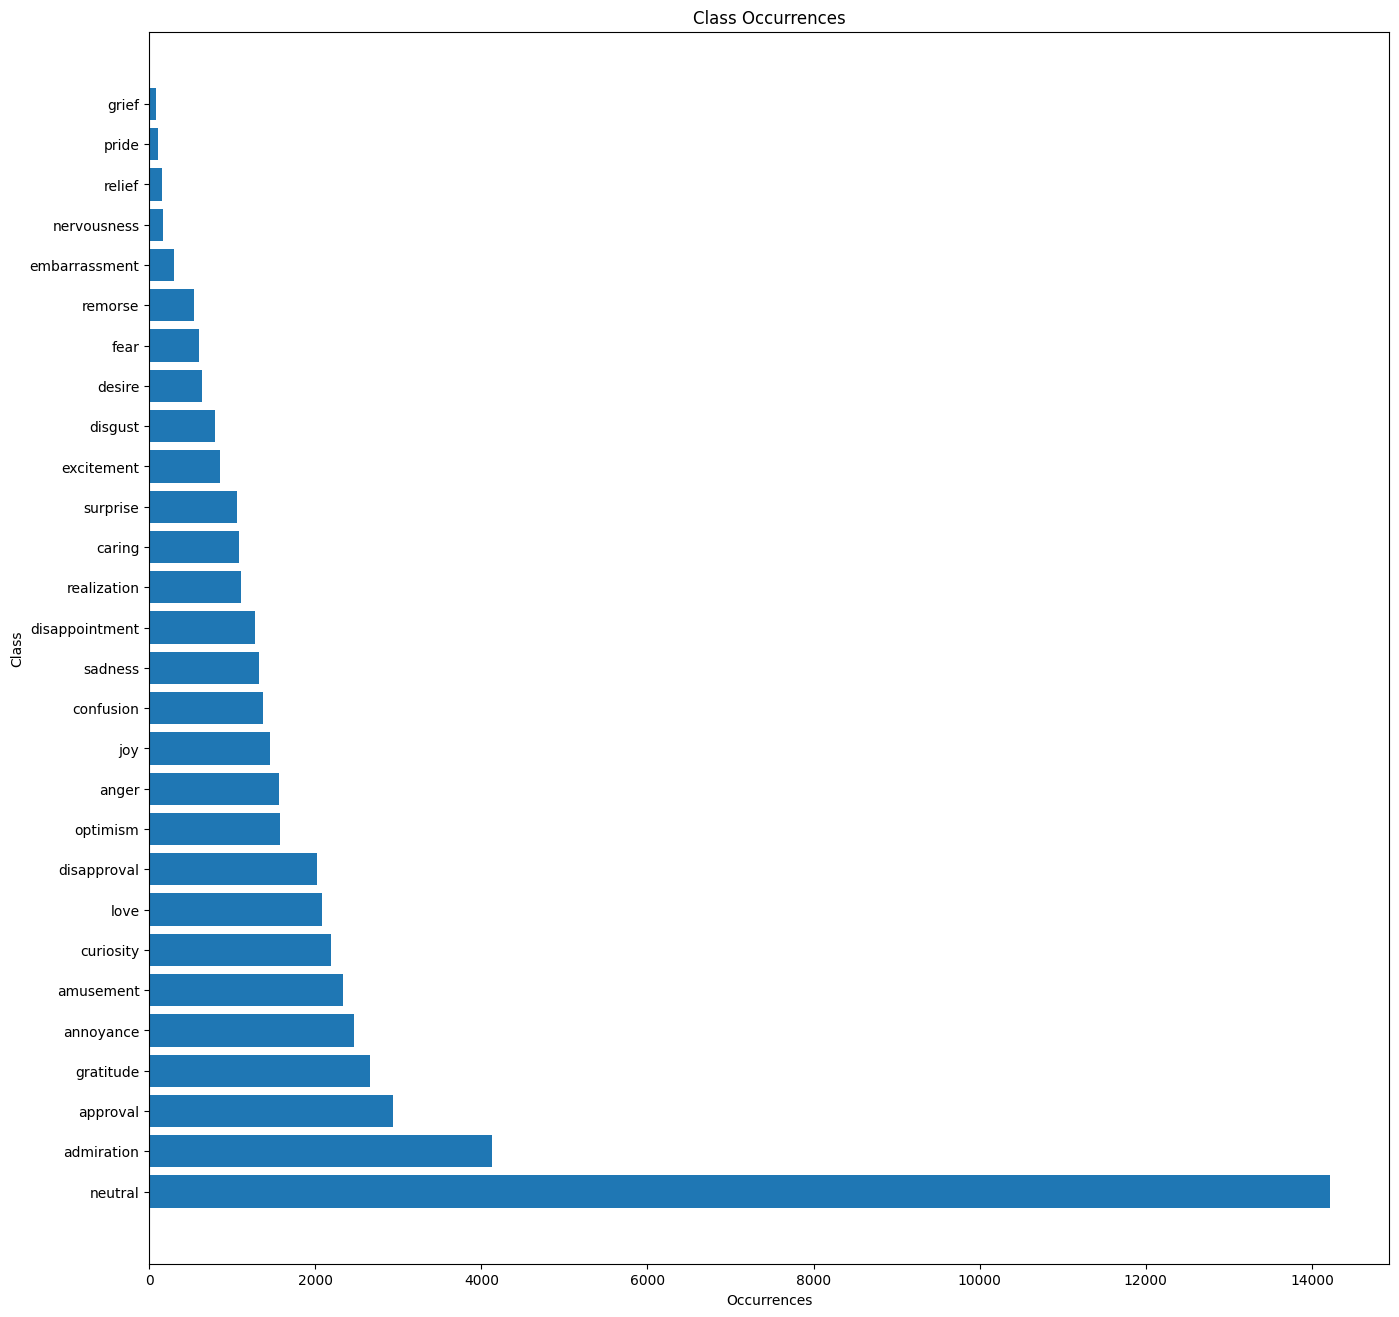

In [ ]:
def count_classes(class_names):
    class_counts = {class_name: 0 for class_name in class_names}

    for item in raw_dataset['train']:
      for class_name in item['labels']:
            class_counts[all_class_names[class_name]] += 1
    return class_counts

feature_distribution = dict(sorted(count_classes(all_class_names).items(), key=lambda item: item[1])) 

print(feature_distribution)

def plot_class_occurrences(class_counts):
    # Get the class names and occurrence counts
    class_names = list(class_counts.keys())
    class_counts = list(class_counts.values())

    # Create a horizontal bar chart
    fig, ax = plt.subplots(figsize=(16, 16))
    ax.barh(class_names, class_counts)

    # Set the axis labels and title
    ax.set_xlabel('Occurrences')
    ax.set_ylabel('Class')
    ax.set_title('Class Occurrences')

    # Invert the y-axis to show the classes in descending order of occurrences
    ax.invert_yaxis()

    # Show the plot
    plt.show()

plot_class_occurrences(feature_distribution)

In [ ]:
# Get top 14 most frequently occuring keys in dataset and fetch their indices
class_names = list(feature_distribution.keys())[-14:]
class_name_idxs = [all_class_names.index(x) for x in class_names]
print(list(zip(class_names, class_name_idxs)))

[('sadness', 25), ('confusion', 6), ('joy', 17), ('anger', 2), ('optimism', 20), ('disapproval', 10), ('love', 18), ('curiosity', 7), ('amusement', 1), ('annoyance', 3), ('gratitude', 15), ('approval', 4), ('admiration', 0), ('neutral', 27)]


In [ ]:
# Here's the indexs of our selected classes
print(class_name_idxs)

[25, 6, 17, 2, 20, 10, 18, 7, 1, 3, 15, 4, 0, 27]


## Filtering

We'll now filter the dataset so it only contains the classes we're interested in

In [ ]:
def flatten_list(arr):
  return [num for sublist in arr for num in sublist]

In [ ]:
# If it has at least one label that is the selected subset of classes it's valid
def is_valid(data_item):
  return not (len(data_item["labels"]) == 1 and data_item["labels"][0] not in class_name_idxs)

# Remove classes that don't have a label in our 14 selected classes 
def remove_invalid_classes(data_item):
  data_item["labels"] = [label for label in data_item["labels"] if label in class_name_idxs] 

  for label in data_item["labels"]:
    assert label in class_name_idxs

  data_item["labels"] = [class_name_idxs.index(label) for label in data_item["labels"]][0:1] # "Rename" old labels

  return data_item

def one_hot_labels(data_item):
  data_item["labels"] = sum(to_categorical(data_item["labels"], len(class_name_idxs)), axis = 0)
  return data_item

# Apply dataset processing
dataset = raw_dataset.filter(lambda x: is_valid(x)).map(remove_invalid_classes)

# One-hot the labels
dataset_control = dataset.map(one_hot_labels)

Filter:   0%|          | 0/43410 [00:00<?, ? examples/s]

Filter:   0%|          | 0/5426 [00:00<?, ? examples/s]

Filter:   0%|          | 0/5427 [00:00<?, ? examples/s]

Map:   0%|          | 0/38100 [00:00<?, ? examples/s]

Map:   0%|          | 0/4756 [00:00<?, ? examples/s]

Map:   0%|          | 0/4728 [00:00<?, ? examples/s]

Map:   0%|          | 0/38100 [00:00<?, ? examples/s]

Map:   0%|          | 0/4756 [00:00<?, ? examples/s]

Map:   0%|          | 0/4728 [00:00<?, ? examples/s]

## Tokenisation

In [ ]:
seq_lens = [len(tokenizer(x)["input_ids"]) for x in dataset_control["train"]["text"]]

seq_len = int(ceil(mean(seq_lens) + std(seq_lens)))

dataset_tokenized = dataset_control.map(tokenize_dataset)

print(dataset_tokenized)

Map:   0%|          | 0/38100 [00:00<?, ? examples/s]

Map:   0%|          | 0/4756 [00:00<?, ? examples/s]

Map:   0%|          | 0/4728 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'id', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 38100
    })
    validation: Dataset({
        features: ['text', 'labels', 'id', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 4756
    })
    test: Dataset({
        features: ['text', 'labels', 'id', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 4728
    })
})


## Model Definition
In this experiment. We are not changing the model, so both utilise this definition.

In [ ]:
# Resets TF graph to release memory
tf.keras.backend.clear_session()

def define_model():
  input_ids = Input(shape = (seq_len,), dtype = "int32", name = "input_ids")
  token_type_ids = Input(shape = (seq_len,), dtype = "int32", name = "token_type_ids")
  attention_masks = Input(shape = (seq_len,), dtype = "int32", name = "attention_mask")

  bert = TFBertForSequenceClassification.from_pretrained("bert-base-cased", num_labels = 14)

  inputs = {"input_ids": input_ids, "attention_mask": attention_masks, "token_type_ids": token_type_ids}
  outputs = bert(inputs)
  model = outputs.logits
  
  model = Dense(14, activation = "softmax")(model)

  model = Model(inputs = [input_ids, token_type_ids, attention_masks], outputs = model)

  optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4)

  model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

  return model

define_model().summary()

model = define_model()

early_stopping = EarlyStopping(monitor = "val_accuracy", patience = 8, restore_best_weights = True)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 attention_mask (InputLayer)    [(None, 30)]         0           []                               
                                                                                                  
 input_ids (InputLayer)         [(None, 30)]         0           []                               
                                                                                                  
 token_type_ids (InputLayer)    [(None, 30)]         0           []                               
                                                                                                  
 tf_bert_for_sequence_classific  TFSequenceClassifie  108321038  ['attention_mask[0][0]',         
 ation (TFBertForSequenceClassi  rOutput(loss=None,               'input_ids[0][0]',          

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model = define_model()

batch_size = 128

def create_test_dataset(ds):
  return ds["train"].to_tf_dataset( # 1000 for speed debugging, for full training, comment out the ".select(n)"
  columns = ["input_ids", "token_type_ids", "attention_mask"],
  label_cols = ["labels"],
  batch_size = batch_size,
  shuffle = True,
)
  
def create_train_dataset(ds):
  return ds["test"].to_tf_dataset( # 1000 for speed debugging, for full training, comment out the ".select(n)"
  columns = ["input_ids", "token_type_ids", "attention_mask"],
  label_cols = ["labels"],
  batch_size = batch_size,
  shuffle = True,
)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Control Training

In [ ]:
control_tf_test_dataset = create_test_dataset(dataset_tokenized)
control_tf_train_dataset = create_train_dataset(dataset_tokenized)

# Create a variable to use for our metrics for our display functions. This is used by all experiments.
control_test_display_item = list(control_tf_test_dataset)[1]
control_test_data, control_test_labels = control_test_display_item

control_history = model.fit(control_tf_train_dataset, validation_data = control_tf_test_dataset , epochs = 40, callbacks = [early_stopping]).history

Epoch 1/40


## Metrics

In [ ]:
output_metrics(model, control_test_data, control_test_labels)
plot_confusion_matrix(model, control_test_data, control_test_labels)

# Experiment 2.0: Grammer Correction

---
Here I define the function that attempts to correct any grammer errors in each sentence. 


## Preparation

In [ ]:
# We take a copy of the dataset that we processed earlier before tokenisation is applied.
dataset_2 = dataset_control.copy()
print(dataset_2)

## Grammer Correction

In [ ]:
category_count = {}
ruleid_count = {}

tool = LanguageTool('en-US')

def correct_grammar(example):
    sentence = example['text']
    # Check for errors in the sentence
    errors = tool.check(sentence)
    
    # If there are errors, correct them
    if len(errors) > 0:
        # Correct errors one at a time, starting with the last error
        # Start with the last error to avoid changing offset of errors that come after current error
        for error in reversed(errors):
            category = error.category
            ruleid = error.ruleId
            category_count[category] = category_count.get(category, 0) + 1
            ruleid_count[ruleid] = ruleid_count.get(ruleid, 0) + 1
            # At least one replacement suggestion of the error
            if len(error.replacements) > 0:
                # Take first portion of sentence before the error, replace the word with the most LanguageTool's more confident correction
                # Then add on the portion after the error
                corrected = sentence[:error.offset] + error.replacements[0] + sentence[error.offset + error.errorLength:]
                sentence = corrected
                example['text'] = ''.join(sentence)
    # Return the corrected sentence
    return example


In [ ]:
import time
# Apply the correction function to the entire dataset using map
# This returns a dict. So we need to wrap the dict containing 3 datsets into a single dataset again
end_time_2 = 0
start_time_2 = 0 
start_time_2 = time.time()
train_corrected = dataset_2['train'].map(correct_grammar)
end_time_2 = time.time()
elapsed_time_2 = end_time_2 - start_time_2
print("TIME TAKEN: {}".format(elapsed_time_2))

In [ ]:
# Plot the top 5 categories by count
top_categories = dict(sorted(category_count.items(), key=lambda item: item[1], reverse=True)[:10])
fig, ax = plt.subplots(figsize=(40, 6))
ax.bar(top_categories.keys(), top_categories.values())
ax.set_title('Number of Errors by Top 5 Categories')
ax.set_xlabel('Category')
ax.set_ylabel('Count')
plt.show()

# Plot the top 5 rule IDs by count
top_ruleids = dict(sorted(ruleid_count.items(), key=lambda item: item[1], reverse=True)[:10])
fig, ax = plt.subplots(figsize=(40, 6))
ax.bar(top_ruleids.keys(), top_ruleids.values())
ax.set_title('Number of Errors by Top 5 Rule IDs')
ax.set_xlabel('Rule ID')
ax.set_ylabel('Count')
plt.show()

In [ ]:
for i in range(10):
  print(dataset_2['train']['text'][i])

In [ ]:
dataset_2['train'] = train_corrected

In [ ]:
for i in range(10):
  print(dataset_2['train']['text'][i])

In [ ]:
dataset_2 = DatasetDict(dataset_2)

## Tokenization

In [ ]:
experiment_2_tokenized = dataset_2.map(tokenize_dataset)

## Training

In [ ]:
# Train the model with default learning rate
experiment_2_tf_test_dataset = create_test_dataset(experiment_2_tokenized)
experiment_2_tf_train_dataset = create_train_dataset(experiment_2_tokenized)

# Create a variable to use for our metrics for our display functions. This is used by all experiments.
experiment_2_test_display_item = list(experiment_2_tf_test_dataset)[2]
experiment_2_test_data, experiment_2_test_labels = experiment_2_test_display_item

experiment_2_history = model.fit(experiment_2_tf_train_dataset, validation_data = experiment_2_tf_test_dataset , epochs = 40, callbacks = [early_stopping]).history

# Experiment 2.1: lemmatization before grammer correction
Next I'll expand contracted words, for example "don't" and "they're" into their expanded form. My justification for this is all expanded and contracted words will now have the same token. Instead of being treated as seperate tokens as they will be a mix of contracted and expanded forms.

This will reduce the vocabulary size, which could improve the performance of our model. Therefore, I believe it's a worthwhile experiment.

## Preparation

In [ ]:
# Make another copy to use for 1.1
dataset_2_1 = dataset_control.copy()

In [ ]:
for i in range(10):
  print(dataset_2_1['train']['text'][i])

## Grammer Correction

In [ ]:
end_time_2_1 = 0
start_time_2_1 = 0 
start_time_2_1 = time.time()
train_corrected = dataset_2_1['train'].map(correct_grammar)
end_time_2_1 = time.time()
elapsed_time_2_1 = end_time_2_1 - start_time_2_1

In [ ]:
dataset_2_1['train'] = train_corrected

In [ ]:
# LEMM
for i in range(10):
  print(dataset_2_1['train']['text'][i])

## Lemmatization

In [ ]:
def lemmatize(example):
    lemmatizer = WordNetLemmatizer()
    words = nltk.word_tokenize(example['text'])
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    example['text'] = ' '.join(lemmatized_words)
    return example

In [ ]:
train_lemmatized = dataset_2_1['train'].map(lemmatize)

In [ ]:
dataset_2_1['train'] = train_lemmatized

In [ ]:
# LEMM
for i in range(10):
  print(dataset_2_1['train']['text'][i])

In [ ]:
dataset_2_1 = DatasetDict(dataset_2_1)

## Initial Evaluation

In [ ]:
# Plot the top 5 categories by count
top_categories = dict(sorted(category_count.items(), key=lambda item: item[1], reverse=True)[:10])
fig, ax = plt.subplots(figsize=(40, 6))
ax.bar(top_categories.keys(), top_categories.values())
ax.set_title('Number of Errors by Top 5 Categories')
ax.set_xlabel('Category')
ax.set_ylabel('Count')
plt.show()

# Plot the top 5 rule IDs by count
top_ruleids = dict(sorted(ruleid_count.items(), key=lambda item: item[1], reverse=True)[:10])
fig, ax = plt.subplots(figsize=(40, 6))
ax.bar(top_ruleids.keys(), top_ruleids.values())
ax.set_title('Number of Errors by Top 5 Rule IDs')
ax.set_xlabel('Rule ID')
ax.set_ylabel('Count')
plt.show()

# Compute the total count for each category and rule ID
total_category_count = sum(category_count.values())
total_ruleid_count = sum(ruleid_count.values())

# Print the total count for each category and rule ID
print(f"Total number of errors by category: {total_category_count}")
print(f"Total number of errors by rule ID: {total_ruleid_count}")

## Tokenization

In [ ]:
experiment_2_1_tokenized = dataset_2_1.map(tokenize_dataset)

## Training

In [ ]:
experiment_2_1_tf_test_dataset = create_test_dataset(experiment_2_1_tokenized)
experiment_2_1_tf_train_dataset = create_train_dataset(experiment_2_1_tokenized)

# Create a variable to use for our metrics for our display functions. This is used by all experiments.
experiment_2_1_test_display_item = list(experiment_2_1_tf_test_dataset)[1]
experiment_2_1_test_data, experiment_2_1_test_labels = experiment_2_1_test_display_item

early_stopping = EarlyStopping(monitor = "val_accuracy", patience = 8, restore_best_weights = True)
experiment_2_1_history = model.fit(create_train_dataset(experiment_2_1_tokenized), validation_data = create_test_dataset(experiment_2_1_tokenized), epochs = 40, callbacks = [early_stopping]).history

## Metrics

In [ ]:
output_metrics(model, experiment_2_1_test_data, experiment_2_1_test_labels)
plot_confusion_matrix(model, experiment_2_1_test_data, experiment_2_1_test_labels)

# Experiment 2.2: Lemmatization with POS
---
Upon analysing the results of the spell checker. I looked into ways to improve the results further. Looking into the processed dataset, I noticed various false postive corrections. 

The pre-trained model I'm using from spacy will access the word's grammatical role in the sentence.

If the words are tagged as: `["NOUN", "VERB", "ADJ", "ADV"]` then we spell check the words. My reasoning for this is because misspelled words that are not in these categories will be difficult to spellcheck correclty. We should be able to see a drop in high distance corrections.

Looking into this dataset some more, it contains various slang and abrivations which won't be recognised in Hunspell's dictionary and Hunspell will correct them. This could decrease our accuracy as while they're not in a dictionary, they're used in other sentences accross the dataset with the same spelling.

The function will now not run the Hunspell spell-checker on words that aren't in the category of: `["NOUN", "VERB", "ADJ", "ADV"]`. So these slang and abrivations terms won't be passed into the spell-checker.







## Preparation

In [ ]:
# Make another copy to use for 1.1
dataset_2_2 = dataset_control.copy()

## Lemmatize with POS (Part of Speach)

In [ ]:
def lemm_with_pos_tagging(example):
    tokens = word_tokenize(example['text'])
    tagged = pos_tag(tokens)
    lemmatizer = WordNetLemmatizer()
    pos_tags = {'N': wordnet.NOUN, 'V': wordnet.VERB, 'R': wordnet.ADV, 'J': wordnet.ADJ}
    words = []
    for word, tag in tagged:
        if tag[0] in pos_tags:
            words.append(lemmatizer.lemmatize(word, pos=pos_tags[tag[0]]))
        else:
            words.append(lemmatizer.lemmatize(word))
    example['text'] = ' '.join(words)
    return example


In [ ]:
train_lemmatized_POS = dataset_2_2['train'].map(lemm_with_pos_tagging)

In [ ]:
dataset_2_2['train'] = train_lemmatized_POS

In [ ]:
for i in range(100):
  print(dataset_2_2['train']['text'][i])

In [ ]:
end_time_2_2 = 0
start_time_2_2 = 0 
start_time_2_2 = time.time()
train_corrected = dataset_2_2['train'].map(correct_grammar)
end_time_2_2 = time.time()
elapsed_time_2_2 = end_time_2_2 - start_time_2_2

In [ ]:
dataset_2_2['train'] = train_corrected

In [ ]:
for i in range(100):
  print(dataset_2_2['train']['text'][i])

In [ ]:
dataset_2_2 = DatasetDict(dataset_2_2)

## Tokenization

In [ ]:
experiment_2_2_tokenized = dataset_2_2.map(tokenize_dataset)

## Initial Evaluation

In [ ]:
# Plot the top 5 categories by count
top_categories = dict(sorted(category_count.items(), key=lambda item: item[1], reverse=True)[:10])
fig, ax = plt.subplots(figsize=(40, 6))
ax.bar(top_categories.keys(), top_categories.values())
ax.set_title('Number of Errors by Top 5 Categories')
ax.set_xlabel('Category')
ax.set_ylabel('Count')
plt.show()

# Plot the top 5 rule IDs by count
top_ruleids = dict(sorted(ruleid_count.items(), key=lambda item: item[1], reverse=True)[:10])
fig, ax = plt.subplots(figsize=(40, 6))
ax.bar(top_ruleids.keys(), top_ruleids.values())
ax.set_title('Number of Errors by Top 5 Rule IDs')
ax.set_xlabel('Rule ID')
ax.set_ylabel('Count')
plt.show()

# Compute the total count for each category and rule ID
total_category_count = sum(category_count.values())
total_ruleid_count = sum(ruleid_count.values())

# Print the total count for each category and rule ID
print(f"Total number of errors by category: {total_category_count}")
print(f"Total number of errors by rule ID: {total_ruleid_count}")

## Training

In [ ]:
# Train the model with default learning rate
model = define_model()

experiment_2_2_tf_test_dataset = create_test_dataset(experiment_2_2_tokenized)
experiment_2_2_tf_train_dataset = create_train_dataset(experiment_2_2_tokenized)

# Create a variable to use for our metrics for our display functions. This is used by all experiments.
experiment_2_2_test_display_item = list(experiment_2_2_tf_test_dataset)[1]
experiment_2_2_test_data, experiment_2_2_test_labels = experiment_2_2_test_display_item

experiment_2_2_history = model.fit(create_train_dataset(experiment_2_2_tokenized), validation_data = create_test_dataset(experiment_2_2_tokenized), epochs = 10, callbacks = [early_stopping]).history

## Metrics

In [ ]:
# plot_graphs([control_history["lr"]], "learning_rate", legend = ["lr"], y_scale = "log")
output_metrics(model, experiment_2_2_test_data, experiment_2_2_test_labels)
plot_confusion_matrix(model, experiment_2_2_test_data, experiment_2_2_test_labels)

# Experiment 2.3: Removing stop-words, lemmatizing with POS then correcting grammer

## Preparation

In [ ]:
dataset_2_3 = dataset_control.copy()

## Remove stop words

In [ ]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    tokens = text['text'].split()
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    text['text'] = ' '.join(filtered_tokens)
    return text

In [ ]:
removed_stopwords = dataset_2_3['train'].map(remove_stopwords)

In [ ]:
dataset_2_3['train'] = removed_stopwords

## Lemmatize with POS

In [ ]:
train_lemmatized_POS = dataset_2_3['train'].map(lemm_with_pos_tagging)

In [ ]:
dataset_2_3['train'] = train_lemmatized_POS

## Grammer correction

In [ ]:
end_time_2_3 = 0
start_time_2_3 = 0 
start_time_2_3 = time.time()
train_corrected = dataset_2_3['train'].map(correct_grammar)
end_time_2_3 = time.time()
elapsed_time_2_3 = end_time_2_3 - start_time_2_3

In [ ]:
dataset_2_3['train'] = train_corrected

In [ ]:
for i in range(100):
  print(dataset_2_3['train']['text'][i])

In [ ]:
dataset_2_3 = DatasetDict(dataset_2_3)

## Tokenization

In [ ]:
experiment_2_3_tokenized = dataset_2_3.map(tokenize_dataset)

## Initial Evaluation

In [ ]:
# Plot the top 5 categories by count
top_categories = dict(sorted(category_count.items(), key=lambda item: item[1], reverse=True)[:10])
fig, ax = plt.subplots(figsize=(40, 6))
ax.bar(top_categories.keys(), top_categories.values())
ax.set_title('Number of Errors by Top 5 Categories')
ax.set_xlabel('Category')
ax.set_ylabel('Count')
plt.show()

# Plot the top 5 rule IDs by count
top_ruleids = dict(sorted(ruleid_count.items(), key=lambda item: item[1], reverse=True)[:10])
fig, ax = plt.subplots(figsize=(40, 6))
ax.bar(top_ruleids.keys(), top_ruleids.values())
ax.set_title('Number of Errors by Top 5 Rule IDs')
ax.set_xlabel('Rule ID')
ax.set_ylabel('Count')
plt.show()

# Compute the total count for each category and rule ID
total_category_count = sum(category_count.values())
total_ruleid_count = sum(ruleid_count.values())

# Print the total count for each category and rule ID
print(f"Total number of errors by category: {total_category_count}")
print(f"Total number of errors by rule ID: {total_ruleid_count}")
print("Total Time of Grammer Correction: {}".format(elapsed_time_2_3))

## Training

In [ ]:
experiment_2_3_tf_test_dataset = create_test_dataset(experiment_2_3_tokenized)
experiment_2_3_tf_train_dataset = create_train_dataset(experiment_2_3_tokenized)

# Create a variable to use for our metrics for our display functions. This is used by all experiments.
experiment_2_3_test_display_item = list(experiment_2_3_tf_test_dataset)[1]
experiment_2_3_test_data, experiment_2_3_test_labels = experiment_2_3_test_display_item

early_stopping = EarlyStopping(monitor = "val_accuracy", patience = 8, restore_best_weights = True)
experiment_2_3_history = model.fit(create_train_dataset(experiment_2_3_tokenized), validation_data = create_test_dataset(experiment_2_3_tokenized), epochs = 40, callbacks = [early_stopping]).history

## Metrics

In [ ]:
output_metrics(model, experiment_2_3_test_data, experiment_2_3_test_labels)
plot_confusion_matrix(model, experiment_2_3_test_data, experiment_2_3_test_labels)

# Evaluation

## Loss

In [ ]:
control_loss = np.array(control_history["loss"])
experiment_2_loss = np.array(experiment_2_history["loss"])
experiment_2_1_loss = np.array(experiment_2_1_history["loss"])
experiment_2_2_loss = np.array(experiment_2_2_history["loss"])
experiment_2_3_loss = np.array(experiment_2_3_history["loss"])

max_length = max(len(control_loss), len(experiment_2_loss), len(experiment_2_1_loss), len(experiment_2_2_loss), len(experiment_2_3_loss))

control_loss_padded = np.pad(control_loss, (0, max_length - len(control_loss)), mode='constant')
experiment_2_loss_padded = np.pad(experiment_2_loss, (0, max_length - len(experiment_2_loss)), mode='constant')
experiment_2_1_loss_padded = np.pad(experiment_2_1_loss, (0, max_length - len(experiment_2_1_loss)), mode='constant')
experiment_2_2_loss_padded = np.pad(experiment_2_2_loss, (0, max_length - len(experiment_2_2_loss)), mode='constant')
experiment_2_3_loss_padded = np.pad(experiment_2_3_loss, (0, max_length - len(experiment_2_3_loss)), mode='constant')

plot_graphs([control_loss_padded, experiment_2_loss_padded, experiment_2_1_loss_padded, experiment_2_2_loss_padded, experiment_2_3_loss_padded], name="Loss", legend=["Control", "Grammer Correction", "Lemmatization before grammer correction", "Leematization with POS", "Removing stop-words, lemmatizating with POS then correcting grammer"])


### No Control

In [ ]:
plot_graphs([experiment_2_loss_padded, experiment_2_1_loss_padded, experiment_2_2_loss_padded, experiment_2_3_loss_padded], name="Loss", legend=["Control", "Grammer Correction", "Lemmatization before grammer correction", "Leematization with POS", "Removing stop-words, lemmatizating with POS then correcting grammer"])


## Val Loss

In [ ]:
control_val_loss = np.array(control_history["val_loss"])
experiment_2_val_loss = np.array(experiment_2_history["val_loss"])
experiment_2_1_val_loss = np.array(experiment_2_1_history["val_loss"])
experiment_2_2_val_loss = np.array(experiment_2_2_history["val_loss"])
experiment_2_3_val_loss = np.array(experiment_2_3_history["val_loss"])

max_length = max(len(control_val_loss), len(experiment_2_val_loss), len(experiment_2_1_val_loss), len(experiment_2_2_val_loss), len(experiment_2_3_val_loss))

control_val_loss_padded = np.pad(control_val_loss, (0, max_length - len(control_val_loss)), mode='constant')
experiment_2_val_loss_padded = np.pad(experiment_2_val_loss, (0, max_length - len(experiment_2_val_loss)), mode='constant')
experiment_2_1_val_loss_padded = np.pad(experiment_2_1_val_loss, (0, max_length - len(experiment_2_1_val_loss)), mode='constant')
experiment_2_2_val_loss_padded = np.pad(experiment_2_2_val_loss, (0, max_length - len(experiment_2_2_val_loss)), mode='constant')
experiment_2_3_val_loss_padded = np.pad(experiment_2_3_val_loss, (0, max_length - len(experiment_2_3_val_loss)), mode='constant')

plot_graphs([control_val_loss_padded, experiment_2_val_loss_padded, experiment_2_1_val_loss_padded, experiment_2_2_val_loss_padded, experiment_2_3_val_loss_padded], name="val_loss", legend=["Control", "Grammer Correction", "Lemmatization before grammer correction", "Leematization with POS", "Removing stop-words, lemmatizating with POS then correcting grammer"])

### No Control

In [ ]:
plot_graphs([experiment_2_val_loss_padded, experiment_2_1_val_loss_padded, experiment_2_2_val_loss_padded, experiment_2_3_val_loss_padded], name="val_loss", legend=["Control", "Grammer Correction", "Lemmatization before grammer correction", "Leematization with POS", "Removing stop-words, lemmatizating with POS then correcting grammer"])


## Accuracy

In [ ]:
control_accuracy = np.array(control_history["accuracy"])
experiment_2_accuracy = np.array(experiment_2_history["accuracy"])
experiment_2_1_accuracy = np.array(experiment_2_1_history["accuracy"])
experiment_2_2_accuracy = np.array(experiment_2_2_history["accuracy"])
experiment_2_3_accuracy = np.array(experiment_2_3_history["accuracy"])

max_length = max(len(control_accuracy), len(experiment_2_accuracy), len(experiment_2_1_accuracy), len(experiment_2_2_accuracy), len(experiment_2_3_accuracy))

control_accuracy_padded = np.pad(control_accuracy, (0, max_length - len(control_accuracy)), mode='constant')
experiment_2_accuracy_padded = np.pad(experiment_2_accuracy, (0, max_length - len(experiment_2_accuracy)), mode='constant')
experiment_2_1_accuracy_padded = np.pad(experiment_2_1_accuracy, (0, max_length - len(experiment_2_1_accuracy)), mode='constant')
experiment_2_2_accuracy_padded = np.pad(experiment_2_2_accuracy, (0, max_length - len(experiment_2_2_accuracy)), mode='constant')
experiment_2_3_accuracy_padded = np.pad(experiment_2_3_accuracy, (0, max_length - len(experiment_2_3_accuracy)), mode='constant')

plot_graphs([experiment_2_accuracy_padded, experiment_2_1_accuracy_padded, experiment_2_2_accuracy_padded, experiment_2_3_accuracy_padded], name="accuracy", legend=["Control", "Grammer Correction", "Lemmatization before grammer correction", "Leematization with POS", "Removing stop-words, lemmatizating with POS then correcting grammer"])


### No Control

In [ ]:
plot_graphs([control_accuracy_padded, experiment_2_accuracy_padded, experiment_2_1_accuracy_padded, experiment_2_2_accuracy_padded, experiment_2_3_accuracy_padded], name="accuracy", legend=["Control", "Grammer Correction", "Lemmatization before grammer correction", "Leematization with POS", "Removing stop-words, lemmatizating with POS then correcting grammer"])
